# Analysis for Entering the Movie Production Business 

**Authors:** Ruthy Yao
***

## Overview

The movie industry is recovering from the Covid-19 pandemic with the cinema attendance picking up steadily and the box-office chasing the high of the pre-pandemic level. Miscrosoft,entrenched in the gaming and entertainemnt business, is looking to step into studio and movie production. This project analyses the key successful factors of a movie studio to prepare Microsoft to enter the movie production market. Description analysis of the populairty score, gross revenue, production budget and profit shows that the top performing genres are Animations, Sci-fi and Adventures and the best months to release movies in a year are May, July and Novemeber. It is advisable to allocate at least $500m of budget to movie production each year. 

## Business Problem

As a new entrant to the movie production market, Microsoft has limited industry knowledge. To complete with globally well-established production companies which have generally over seven to eight decades of history, it is crucial to dive into the vast movie database to distill insights on some of the fundamental issues of running a studio. 

Specifically, this analysis will help Microsoft to find out answers for the following critical questions:

* What type of movies to choose?   
* When to start - what are the best months to release movie? 
* How much investment does it need in terms of the annual production budget?

This will help Microsoft to bridge the knowledge gap, allocate the resources more efficeintly and increase its chances of success for the new studio.

***

## Data Understanding

I collate the data from four well-known movie database:
* IMDB
* The numbers
* The Movie DataBase
* Box Office Mojo

Those database, once combined will give a large dataset of over 2000 movie titles. It will also presents the key characteristics of a movie including the genres, popularity scores, gross revenue and production budget, release date and the studios.


***

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Retreive data from the four databse.

title_basics = pd.read_csv('Data/Source Data/imdb.title.basics.csv.gz')
tmdb_movies = pd.read_csv('Data/Source data/tmdb.movies.csv.gz')
tn_movie_gross = pd.read_csv('Data/Source data/tn.movie_budgets.csv.gz')
bom_movie_gross = pd.read_csv('Data/Source data/bom.movie_gross.csv.gz')

In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
tn_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


IMDB's `title_basics` dataset has the genres data; the `TMDB movie`data has the popularity, vote score. Both the `TN's movie_gross` and the `BOM's movie` dataset have the financial data, however `TN's movie_gross` has the production budget. Hence I will use `TN's movie_gross` for the revenue/budget/profit analysis. Finally, I will extract the studio from the`BOM's movie` for studio budget analysis.

In [7]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Each movie fit into multiple genres. For the genres analysis, I will need to transform the list of genres into multiple rows with one genre in each row.

In [8]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The `title` column will be used as the key to merge with other datasets. A few other redundant columns such as `genre_ids` ,`original_language`. etc, which will be excluded from my analysis. I will remove them in the step of Data Cleaning.

In [9]:
tn_movie_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I will use the `worldwide_gross`  column instead of the `domestic_gross` column for the box office revenue analysis and the former is better representive of a movie's total gross revenue.

In [10]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The only relevant columns in the `BOM's movie` are the title and studio. The rest of them are redundant, which will be removed in the ext step Data Cleaning.

## Data Preparation

I took the following steps to prepare the data: 

1. Data cleaning. This invovles converting the data type, removing the irrelevant columns, and dealing with missing values

 
2. Merge/join the datatables to consoldiate the variables into one dataframe. I will choose the appropriate merge type to minimize the null values post consolidation.


3. Feature engieering. This involves creating new features/columns to prepare for the next step data analysis.

### Data Cleaning

In [11]:
#Subset the title_basics datatable to keep the relevant columns only.
title_basics = title_basics[['primary_title','genres']]

In [12]:
title_basics.head()

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [13]:
#Subset the tmdb datatable to keep the relevant columns only.
tmdb_movies = tmdb_movies[['title','release_date','vote_average','popularity']]

In [14]:
# convert the 'release date' to date data type.
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

In [15]:
tmdb_movies.head()

,title,release_date,vote_average,popularity
0,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7,33.533
1,How to Train Your Dragon,2010-03-26,7.7,28.734
2,Iron Man 2,2010-05-07,6.8,28.515
3,Toy Story,1995-11-22,7.9,28.005
4,Inception,2010-07-16,8.3,27.920


In [16]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         26517 non-null  object        
 1   release_date  26517 non-null  datetime64[ns]
 2   vote_average  26517 non-null  float64       
 3   popularity    26517 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 828.8+ KB


In [17]:
#Remove the irrelevant columns in the TN's database.
tn_movie_gross =tn_movie_gross.drop(columns = ['id','domestic_gross','release_date'])

In [18]:
tn_movie_gross.head()

,movie,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


In [19]:
# Convert the budget and gross revenue columns to numerical data type.
tn_movie_gross[tn_movie_gross.columns[-2:]] = tn_movie_gross[tn_movie_gross.columns[-2:]].replace('[\$,]','',regex=True).astype(np.int64)

In [20]:
tn_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 135.6+ KB


In [21]:
# subset the BOM's datatable to keep the title and studio only.
bom_movie_gross = bom_movie_gross[['title','studio']]

In [22]:
bom_movie_gross.head()

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


### Merge the four dataframes

In [23]:
# Merge the title_basics with the TMDB's movie dataframe to combine the genres with the popularity, vote score. 
genre_popularity = pd.merge(tmdb_movies,title_basics, left_on = 'title',right_on = 'primary_title', how = 'left').drop(columns = 'primary_title')

In [24]:
genre_popularity.head()

,title,release_date,vote_average,popularity,genres
0,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7,33.533,"Adventure,Fantasy,Mystery"
1,How to Train Your Dragon,2010-03-26,7.7,28.734,"Action,Adventure,Animation"
2,Iron Man 2,2010-05-07,6.8,28.515,"Action,Adventure,Sci-Fi"
3,Toy Story,1995-11-22,7.9,28.005,NaN
4,Inception,2010-07-16,8.3,27.920,"Action,Adventure,Sci-Fi"


In [25]:
# Merge the genre_popularity dataframe with the TN's movie_gross dataframe to add the gross revenue and budget into the data.
genre_popularity_rev = pd.merge(genre_popularity,tn_movie_gross,left_on = 'title',right_on = 'movie', how = 'inner').drop(columns=['movie'])

In [26]:
genre_popularity_rev.head()

,title,release_date,vote_average,popularity,genres,production_budget,worldwide_gross
0,How to Train Your Dragon,2010-03-26,7.7,28.734,"Action,Adventure,Animation",165000000,494870992
1,Iron Man 2,2010-05-07,6.8,28.515,"Action,Adventure,Sci-Fi",170000000,621156389
2,Toy Story,1995-11-22,7.9,28.005,NaN,30000000,364545516
3,Toy Story,1995-11-22,7.9,28.005,NaN,30000000,364545516
4,Inception,2010-07-16,8.3,27.920,"Action,Adventure,Sci-Fi",160000000,835524642


In [27]:
genre_popularity_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697 entries, 0 to 4696
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              4697 non-null   object        
 1   release_date       4697 non-null   datetime64[ns]
 2   vote_average       4697 non-null   float64       
 3   popularity         4697 non-null   float64       
 4   genres             4474 non-null   object        
 5   production_budget  4697 non-null   int64         
 6   worldwide_gross    4697 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 257.0+ KB


In [28]:
# Merge the above dataframe with the BOM studio data.
df_movie = pd.merge(genre_popularity_rev,bom_movie_gross,on = 'title',how = 'inner')

In [29]:
df_movie.head()

,title,release_date,vote_average,popularity,genres,production_budget,worldwide_gross,studio
0,How to Train Your Dragon,2010-03-26,7.7,28.734,"Action,Adventure,Animation",165000000,494870992,P/DW
1,Iron Man 2,2010-05-07,6.8,28.515,"Action,Adventure,Sci-Fi",170000000,621156389,Par.
2,Inception,2010-07-16,8.3,27.920,"Action,Adventure,Sci-Fi",160000000,835524642,WB
3,Toy Story 3,2010-06-17,7.7,24.445,"Adventure,Animation,Comedy",200000000,1068879522,BV
4,Despicable Me,2010-07-09,7.2,23.673,"Animation,Comedy,Family",69000000,543464573,Uni.


In [30]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2125 non-null   object        
 1   release_date       2125 non-null   datetime64[ns]
 2   vote_average       2125 non-null   float64       
 3   popularity         2125 non-null   float64       
 4   genres             2057 non-null   object        
 5   production_budget  2125 non-null   int64         
 6   worldwide_gross    2125 non-null   int64         
 7   studio             2124 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 132.9+ KB


In [31]:
# remove the rows with missing value in the "genres" column
df_movie = df_movie.dropna()

In [32]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2057 entries, 0 to 2124
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2057 non-null   object        
 1   release_date       2057 non-null   datetime64[ns]
 2   vote_average       2057 non-null   float64       
 3   popularity         2057 non-null   float64       
 4   genres             2057 non-null   object        
 5   production_budget  2057 non-null   int64         
 6   worldwide_gross    2057 non-null   int64         
 7   studio             2057 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 144.6+ KB


After consolidating all the datasets, there are 2057 movies in the final dataframe.

### Feature Engineering

I create a `profit` feature to analysis the gross profit earned to the studio from a movie. As a rule of thumb, studios get 50% of the gross revenue with the rest goes to the cinema. Hence I use 50% of the worldwide gross revenue deducted by the production budget to calculate the gross profit.

In [33]:
df_movie['profit'] = df_movie['worldwide_gross']*0.5-df_movie['production_budget']

I create features of `year`, `month` and `year_month` for aggregating values in my analysis.

In [34]:
df_movie['release_year'] = df_movie['release_date'].dt.year
df_movie['release_month'] = df_movie['release_date'].dt.month
df_movie['year_month'] = df_movie['release_date'].dt.strftime('%Y-%m')

I explode the `genres` into multiple rows with one genre in each row.

In [35]:
df_movie_explode = df_movie.copy()

In [36]:
# split the genres into a list
df_movie_explode['genres']=df_movie['genres'].str.split(pat=',',expand = False)

In [37]:
# explode the genres list into multiple rows
df_movie_explode=df_movie_explode.explode('genres').dropna()

In [38]:
df_movie_explode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4708 entries, 0 to 2124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              4708 non-null   object        
 1   release_date       4708 non-null   datetime64[ns]
 2   vote_average       4708 non-null   float64       
 3   popularity         4708 non-null   float64       
 4   genres             4708 non-null   object        
 5   production_budget  4708 non-null   int64         
 6   worldwide_gross    4708 non-null   int64         
 7   studio             4708 non-null   object        
 8   profit             4708 non-null   float64       
 9   release_year       4708 non-null   int32         
 10  release_month      4708 non-null   int32         
 11  year_month         4708 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(4)
memory usage: 441.4+ KB


In [39]:
# Save cleaned datasets to csv.
df_movie.to_csv('./Data/df_movie.csv')
df_movie_explode.to_csv('./Data/df_movie_explode.csv')

**Note:** I create two final datasets that will be used for different analyses. The `df_moive_explode` will be used for the genres success analysis as I need to make sure each row of the data associated with only ONE genre. However, by transforming one movie title into multiple rows, it creates duplication. For the studio budget and release month box office performance analysis, the analytical result will be biased if there are duplications of one movie title. Hence, I will use the unexploded dataset `df_moive` for studio budget and movie release time analsis.

## Data Analysis

In [40]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### I - The most popular genres

The `popularity` score from The Movie DataBase is built on the number of votes and views, as well as the number of users who mark it as "favorite" or save it in "watchlist". I'll use the `popularity` score and the `worldwide_gross` revenue as the indicator of movie's popularity.  

In [41]:
# Group the data by genres and examine the average popularity score and average gross revenue for each genre. 
genre_average = df_movie_explode.groupby(['genres'])[['popularity','worldwide_gross']].mean()
genre_average = genre_average.reset_index()

In [42]:
genre_average

,genres,popularity,worldwide_gross
0,Action,16.213868,2.451212e+08
1,Adventure,17.760992,3.622733e+08
2,Animation,14.657526,3.871748e+08
3,Biography,11.370641,8.918469e+07
4,Comedy,11.692046,1.453128e+08
5,Crime,12.169525,9.152109e+07
6,Documentary,9.424076,9.958067e+07
7,Drama,10.547793,8.157516e+07
8,Family,12.149625,1.590037e+08
9,Fantasy,15.026856,2.220726e+08


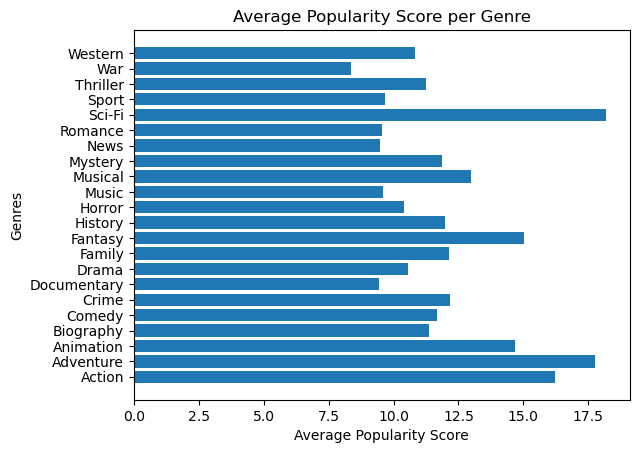

In [43]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['popularity']

ax.set_xlabel('Average Popularity Score')
ax.set_ylabel('Genres')
ax.set_title('Average Popularity Score per Genre')

plt.barh(x,y)

plt.savefig("./images/popularity_score_per_genre.png", dpi =150)
plt.show()

Sci-fi has the highest score, followed by Adventure, Action, Fantasy and Amination. 

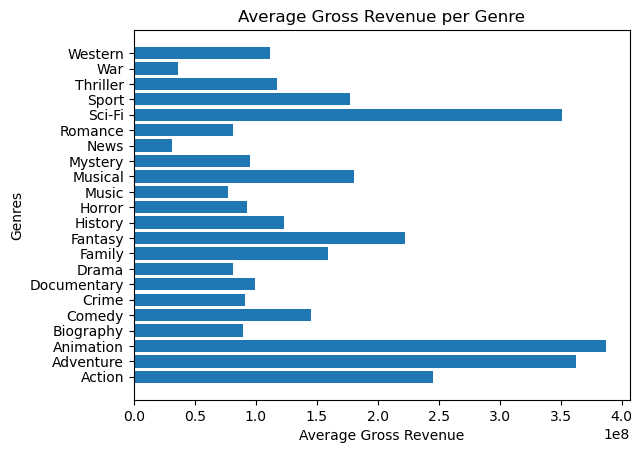

In [44]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['worldwide_gross']

ax.set_xlabel('Average Gross Revenue')
ax.set_ylabel('Genres')
ax.set_title('Average Gross Revenue per Genre')

plt.barh(x,y)

plt.savefig("./images/gross_revenue_per_genre.png", dpi =150)
plt.show()

Animations hit an average \\$3.9m gross revenue globally, the highest among all genres, followed by Adventure and Sci-fi. News and War are the worst performing genres.

Put together the popularity score and the worldwide gross revenue, we see that Animation, Sci-fi and adventures are the most successful movie genres. This is likely due to the broad audieance that those genres get. To the opposite, News and War are the underperforming genres.

### II - The most profitable genres

For the most popular genres, I also want to see if they also make good profit.

In [45]:
df_movie.describe()

,release_date,vote_average,popularity,production_budget,worldwide_gross,profit,release_year,release_month
count,2057,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,2014-02-04 04:04:19.017987328,6.298396,11.712786,4.279986e+07,1.388337e+08,2.661697e+07,2013.536704,7.219251
min,1968-12-23 00:00:00,0.000000,0.600000,5.000000e+04,0.000000e+00,-1.449989e+08,1968.000000,1.000000
25%,2012-02-24 00:00:00,5.800000,7.530000,9.000000e+06,1.430493e+07,-6.860684e+06,2012.000000,4.000000
50%,2014-07-25 00:00:00,6.300000,10.406000,2.500000e+07,5.789719e+07,1.614200e+06,2014.000000,8.000000
75%,2016-07-01 00:00:00,6.900000,14.800000,5.000000e+07,1.589053e+08,3.490232e+07,2016.000000,10.000000
max,2018-12-25 00:00:00,10.000000,80.773000,4.106000e+08,2.048134e+09,7.240671e+08,2018.000000,12.000000
std,NaN,1.098674,7.969013,5.323409e+07,2.226966e+08,7.800046e+07,4.118826,3.465794


Looking at the whole dataframe of ~2000 movies, on average, a movie can generate ~\\$140m gross revenue on a production budget of \\$43m,returning ~\\$27m profit to the studio. 

In [46]:
# Group the data by genres to analyze the average production budget and gross profit for a movie per genre.
genre_average = df_movie_explode.groupby(['genres'])[['production_budget','profit']].mean()
genre_average = genre_average.reset_index()

In [47]:
genre_average.sort_values(['production_budget','profit'], ascending =[False,False])

,genres,production_budget,profit
1,Adventure,1.087790e+08,7.235764e+07
2,Animation,9.852241e+07,9.506498e+07
17,Sci-Fi,9.330051e+07,8.208005e+07
0,Action,8.184542e+07,4.071516e+07
9,Fantasy,7.512727e+07,3.590905e+07
21,Western,5.994444e+07,-4.143774e+06
8,Family,5.676771e+07,2.273413e+07
13,Musical,5.302857e+07,3.712746e+07
10,History,4.830548e+07,1.320053e+07
4,Comedy,4.029319e+07,3.236320e+07


The data indicates that Adventure, Animation and Sci-fi, which are the most popular genres, also cost more to produce. Their production budget can reach the \\$100m mark. This could be driven by the sophistication of those movies that require significant investment in software, technology and high skilled labour. Nevertheless, those genres still make the most profit. 

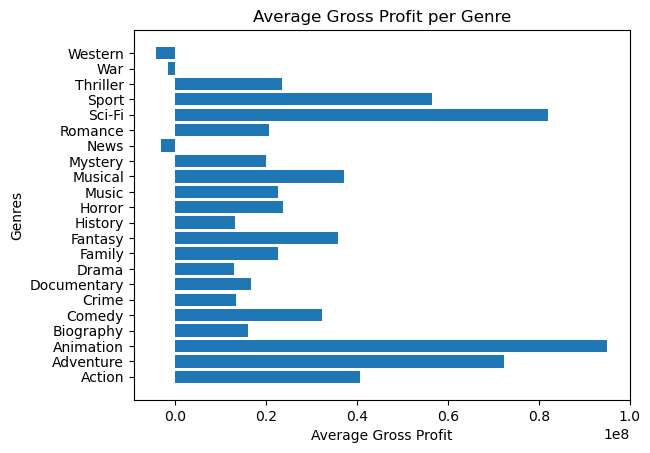

In [48]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['profit']

ax.set_xlabel('Average Gross Profit')
ax.set_ylabel('Genres')
ax.set_title('Average Gross Profit per Genre')

plt.barh(x,y)

plt.savefig("./images/gross_profit_per_genre.png", dpi =150)
plt.show()

The bar chart shows that Animation makes the highest profit, followed by Sci-fi, Adventure. This is aligned with our previous genre recommendation. Western, News and Wars are loss-making genres in general either due to low box office revenues or relatively high production cost. Those are the genres that Miscrsoft should avoid.  

### III - Annual Production Budget  to Run a Studio

In [49]:
df_movie['release_year'].value_counts()

release_year
2015    315
2016    266
2011    252
2013    230
2010    212
2014    210
2017    200
2012    196
2018    149
1986     24
1968      2
2008      1
Name: count, dtype: int64

Movies before year 2010 are very sporatic. Those are old movies where the production budget are not quite relevant to the current age. Hence I decide to exclude them from the dataset for the yearly budget analysis.  

In [50]:
# remove the movies that are released before 2010.
df_movie_filter = df_movie.loc[df_movie['release_year']>=2010]

In [51]:
df_movie_filter.head()

,title,release_date,vote_average,popularity,genres,production_budget,worldwide_gross,studio,profit,release_year,release_month,year_month
0,How to Train Your Dragon,2010-03-26,7.7,28.734,"Action,Adventure,Animation",165000000,494870992,P/DW,82435496.0,2010,3,2010-03
1,Iron Man 2,2010-05-07,6.8,28.515,"Action,Adventure,Sci-Fi",170000000,621156389,Par.,140578194.5,2010,5,2010-05
2,Inception,2010-07-16,8.3,27.920,"Action,Adventure,Sci-Fi",160000000,835524642,WB,257762321.0,2010,7,2010-07
3,Toy Story 3,2010-06-17,7.7,24.445,"Adventure,Animation,Comedy",200000000,1068879522,BV,334439761.0,2010,6,2010-06
4,Despicable Me,2010-07-09,7.2,23.673,"Animation,Comedy,Family",69000000,543464573,Uni.,202732286.5,2010,7,2010-07


Pivot the datatable by years and by studio to see the number of movies a studio produced each year.

In [52]:
studio_movie_count = pd.pivot_table(df_movie_filter,index = 'studio', columns = 'release_year', values='title',aggfunc= 'count')

In [53]:
studio_movie_count

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
3D,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A24,NaN,NaN,NaN,2.0,6.0,5.0,8.0,7.0,3.0
ALP,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
ATO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affirm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
WB,16.0,14.0,18.0,10.0,15.0,20.0,12.0,18.0,16.0
WB (NL),4.0,5.0,3.0,5.0,4.0,16.0,11.0,10.0,12.0
WHE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I only interested in studios that have been consistently producing movies each year in the last 9 years. Hence, I'll remove the studios with missing values.

In [54]:
studio_movie_count = studio_movie_count.dropna()

In [55]:
studio_movie_count

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,11.0,17.0,10.0,10.0,14.0,16.0,14.0,8.0,8.0
Focus,4.0,16.0,4.0,5.0,5.0,2.0,21.0,3.0,4.0
Fox,19.0,20.0,17.0,20.0,15.0,33.0,17.0,16.0,9.0
FoxS,11.0,14.0,3.0,17.0,8.0,10.0,4.0,18.0,2.0
IFC,3.0,7.0,8.0,5.0,5.0,4.0,1.0,11.0,1.0
LGF,12.0,17.0,7.0,6.0,7.0,10.0,17.0,5.0,7.0
Par.,8.0,13.0,8.0,10.0,22.0,10.0,19.0,6.0,7.0
SGem,7.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0,4.0
Sony,11.0,12.0,10.0,8.0,5.0,16.0,16.0,10.0,5.0


Let's have a look of the annual production budget of each studio.

In [56]:
studio_bud = pd.pivot_table(df_movie_filter,index = 'studio', columns = 'release_year', values='production_budget',aggfunc= 'sum').dropna()

In [57]:
studio_bud

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,1.515000e+09,2.368600e+09,1.051000e+09,1.358000e+09,1.270800e+09,2.472600e+09,2.045000e+09,1.465000e+09,1.470900e+09
Focus,3.900000e+07,2.532000e+08,1.350000e+08,5.800000e+07,9.400000e+07,2.400000e+07,3.968000e+08,9.000000e+07,8.500000e+07
Fox,1.345500e+09,1.075000e+09,8.115000e+08,1.633000e+09,1.373000e+09,2.314500e+09,1.104000e+09,1.196000e+09,4.210000e+08
FoxS,1.385000e+08,1.635100e+08,1.280000e+07,1.883500e+08,8.980000e+07,1.300000e+08,3.600000e+07,2.270000e+08,2.500000e+07
IFC,1.705000e+07,7.040000e+07,1.509200e+08,2.625000e+07,5.100000e+07,1.670000e+08,1.000000e+07,2.250000e+07,4.000000e+07
LGF,3.517630e+08,4.441000e+08,3.365000e+08,2.435000e+08,3.100000e+08,5.360000e+08,3.250000e+08,1.180000e+08,1.790000e+08
Par.,5.090000e+08,1.070000e+09,2.280000e+08,1.090000e+09,1.392000e+09,1.890000e+08,1.100000e+09,5.630000e+08,2.630000e+08
SGem,2.475000e+08,1.240000e+08,1.070000e+08,8.000000e+07,2.400000e+07,4.100000e+07,3.800000e+07,7.500000e+07,5.600000e+07
Sony,7.780000e+08,6.960000e+08,8.940000e+08,6.830000e+08,4.150000e+08,1.250000e+09,9.330000e+08,6.090000e+08,2.620000e+08


Work out the average of the 12 studios on the annual budget and the number of titles produced each year.

In [58]:
df_studio_bud = pd.DataFrame({'annual_budget':studio_bud.mean(),'num_titles':studio_movie_count.mean()})

In [59]:
df_studio_bud

,annual_budget,num_titles
release_year,,
2010,6.664427e+08,10.833333
2011,6.864925e+08,13.000000
2012,5.521850e+08,10.083333
2013,7.780917e+08,11.083333
2014,5.692583e+08,10.416667
2015,8.813500e+08,16.000000
2016,6.609000e+08,13.833333
2017,6.643750e+08,10.500000
2018,5.283250e+08,8.333333


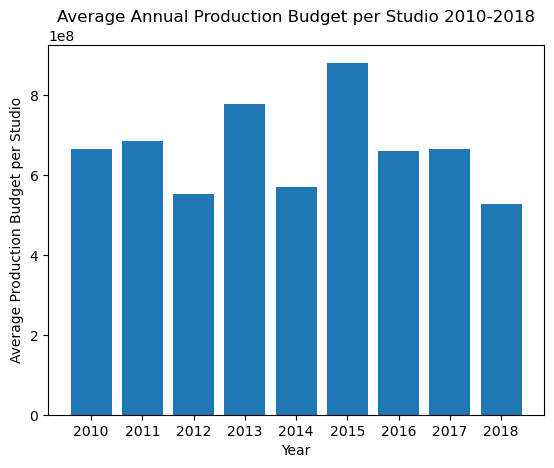

In [60]:
fig, ax = plt.subplots()

x= studio_bud.columns
y= df_studio_bud['annual_budget']

ax.set_xlabel('Year')
ax.set_ylabel('Average Production Budget per Studio')
ax.set_title('Average Annual Production Budget per Studio 2010-2018')
ax.set_xticks(np.arange(2010,2019,1))

plt.bar(x,y)

plt.savefig("./images/studio_annual_production_budget.png", dpi =150)
plt.show()

Before 2015, studios invested averagely ~$650m each year to produce 10-13 movies. Production budget peaked in 2015. Since then, the overall scale of the production is trending down. This could indicates a strategic shift for most studios towards high-quality blockbusters with limited output. 

Overall, looking at the 9 years data, it shows that a studio's annual production budget sits in a range of \\$550m -\\$700m with an annual output of 8-13 movies.

### IV - Best Month to Release Movies

I use the `df_movie_filter` dataset examine which month achieve the highest average box office gross in the last 10 years.

In [61]:
month = df_movie_filter['year_month'].sort_values().unique()

In [62]:
movie_gross = df_movie_filter[['year_month','worldwide_gross']].groupby('year_month').mean()
df_movie_gross = pd.DataFrame(movie_gross).rename(columns ={'worldwide_gross': 'Average Gross Revenue'})

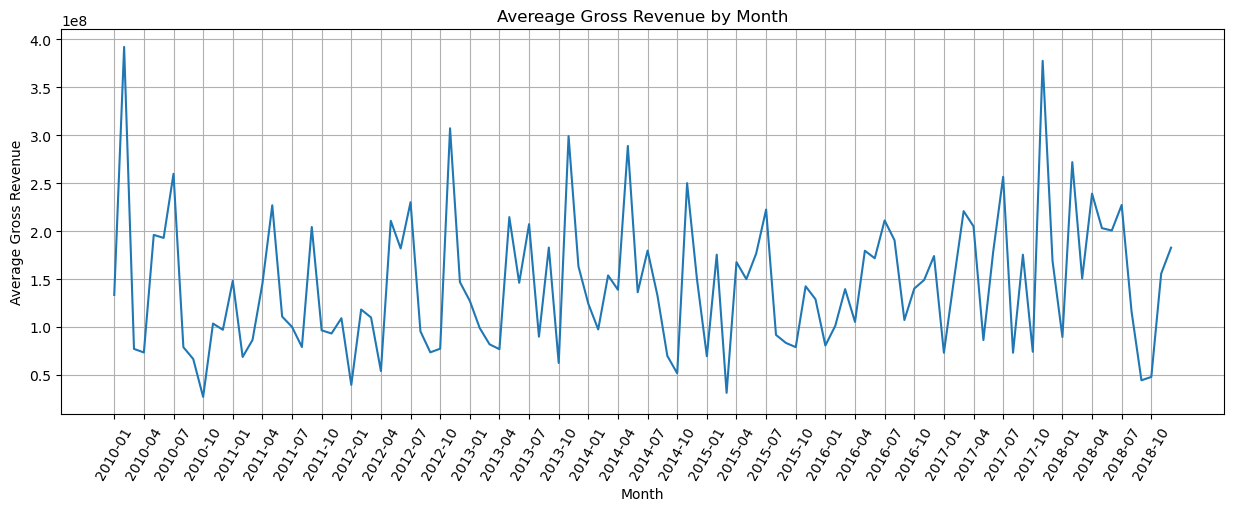

In [63]:
fig,ax=plt.subplots(figsize=(15,5))
ax.set_xlabel('Month')
ax.set_ylabel('Average Gross Revenue')
ax.set_title('Avereage Gross Revenue by Month')

count_plt = ax.plot(df_movie_gross)
plt.xticks(month[::3],rotation = 60)
plt.grid()

plt.savefig("./images/average_gross_revenue_by_month.png", dpi =150)
plt.show()

The gross revenue typically peaks in the month of May, July and November each year and plummet in October and March. The May and July peak is likely to be driven by the school holiday whereas the Novemeber peak is probably a result of the upcoming award season - studios release their movies three months before the Academy Awards so their movies are fresh in the public's and the voters' minds. 

## Conclusions

This analysis leads to three recommendations for Microsoft to start the movie production business successfully.

- **Focus on genres with a mix of Animation, Sci-fi and Adventure.** This type of movies have potentially the broadest span of audience demographics. Hence from popularity and box office performance persepctives, those types of movie deliver the most success. 

- **Allocate at least \\$500m budget to movie production each year.** Given that a movie costs averagely \\$40m-\\$50m to produce with the Animation/Sci-fi/Adventure requiring even higher budget(at least \\$80m), Microsfot need to be prepared to invest at least \\$500m per year to to the new studio in order to make an impactful debut to the movie market as well as sustain the ongoing success of the studio. 

- **Release movies in May/July or November to maximize the box office revenue and achieve the best theatrical view.** School holiday season is the best time to relase movie, especially for the Animation/Sci-fi/Adventure genres that target kids and families. Novermber is also a good time to release movie if Microsoft wants to compete in the upcoming Academy Awards as releasing a movie two or three months before the nomination of the awards will make it fresh in the voters' mind, increasing the chances of win.   
***

### Next Steps:

Further analyses could yield additional insights to further increase the chances of success of the new studio:

- **Modelling to extract the insights from movie reviews and critiques** - Extracting and analysing data from reviews and critiques can unveil further insights on what kinds of movies are liked or disliked by the public.  

- **Customer segmentation analysis** - Segmenting the customers based on demographics to analyze the genre prefernece and viewing behaviours of different customer groups. This will allow Miscrosoft to target certain customer groups for the movie production.

- **Awards analysis** - Dive into the Oscar-awarded movies to identify the key attributes of successful movies. 